In [2]:
#workspace()
include("../src/UNSflow.jl")
using UNSflow


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:606
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:674

Use "(eld::EldUpIntDef)(...)" instead.

Use "(eld::EldUpInttstartDef)(...)" instead.

Use "(kelv::KelvinCondition)(...)" instead.

Use "(kelv::KelvinCondition2DOF)(...)" instead.

Use "(kelv::KelvinCondition2DFree)(...)" instead.

Use "(kelv::KelvinConditionwFlap)(...)" instead.

Use "(kelv::KelvinKutta)(...)" instead.

Use "(kelv::Kelvin

In [4]:
#Construct dimensionless quantities from given values
AR = 6

#_dAll values below are nondimensional
c = 1
u = 1
t_tot = 15.0


n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end


#Run LDVM at all these locations:
alpha_amp = 5*pi/180
h_amp = 0.

dtstar = 0.015

nsteps =round(Int,t_tot/dtstar)+1

hdef = ConstDef(h_amp)
alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

full_kinem = KinemDef(alphadef, hdef, udef)
surf = TwoDSurf(c, u, "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)
curfield = TwoDFlowField()
del = DelVortDef(1, 500, 10)

mt, st, ct = ldvm(surf, curfield, nsteps, dtstar)




  likely near In[4]:41
  likely near In[4]:41
  likely near In[4]:41
  likely near In[4]:41
  likely near In[4]:41
  likely near In[4]:41
  likely near In[4]:41
  likely near In[4]:41
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in slice(::Array{Float64,2}, ::Vararg{Any,N}) at ./deprecated.jl:30
 in sumabs2j at /Users/kiran/.julia/v0.5/NLsolve/src/utils.jl:1 [inlined]
 in trust_region_(::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Float64, ::Bool) at /Users/kiran/.julia/v0.5/NLsolve/src/trust_region.jl:105
 in #nlsolve#17(::Symbol, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Function, ::Float64, ::Bool, ::NLsolve.#nlsolve, ::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}) at /Users/kiran/.julia/v0.5/NLsolve/src/nlsolve_func_defs.jl:24
 in ldvm(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64, ::Float64, ::UNSflow.DelVortDef) at /Users/kiran/Documents/Projects/UNSflow/

(
[0.015 0.0872665 … 9.74096 0.0123073; 0.03 0.0872665 … 0.306189 0.0124999; … ; 15.0 0.0872665 … 0.524017 0.0439935; 15.015 0.0872665 … 0.524041 0.0439974],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,"Prescribed",UNSflow.KinemDef(UNSflow.ConstDef(0.08726646259971647),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.08726646259971647,0.0,0.0,0.0,1.0,0.0),[-16.015,-16.0145,-16.0129,-16.0104,-16.0068,-16.0021,-15.9965,-15.9899,-15.9823,-15.9738  … 

In [5]:

    

for i = 1:Int(n_span/2) #Same solution at all locations
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end


#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

In [6]:
lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)
sp_gam = zeros(nsteps,n_span)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)




1001-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [9]:
bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end
        

In [18]:
a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)
gam_other = zeros(nsteps,n_span)

b_d = 6
c_d = 1

for i = 1:nsteps
    for j = 1:n_span
         sp_gam[i,j] = 0
         for n = 1:n_bterm
             sp_gam[i,j] = sp_gam[i,j] + 2*b_d*u*b_coeff[i,n]*sin(n*psi[j])
         end
    end  
end

for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
        gam_other[i,j] = u*c_d*pi*(W_mat[j][i,9] + a03d[i,j])
    end
end




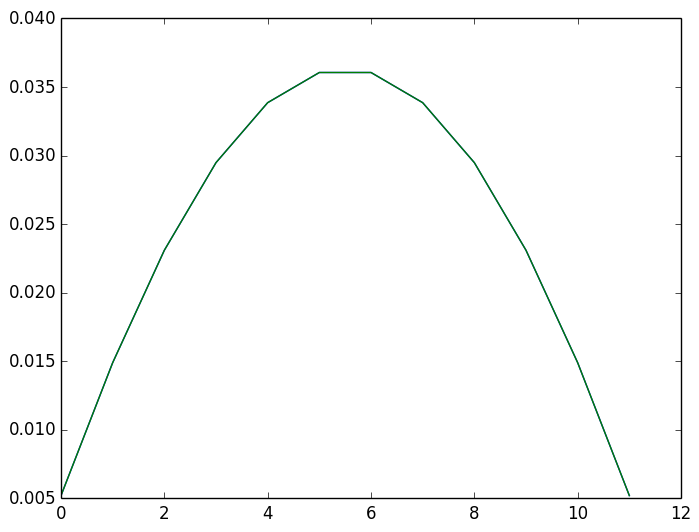

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318ae4e10>

In [19]:
plot(sp_gam[10,1:n_span])
plot(gam_other[10,:])
#plot(a03d[10,:])
#plot(a0dot3d[10,:])

In [24]:
W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)



W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180



W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end


#cn_w = 

#sum_bcoeff = 0
#    for n = 1:n_bterm
#        if rem(n,2) != 0
#            sum_bcoeff = sum_bcoeff + b_coeff[n]
#        end
#    end

#    cnc_f[i] = -2*pi*(u[i]*cos(alpha[i])/surf.uref + hdot[i]*sin(alpha[i])/surf.uref)*(sum_bcoeff)
#    sum_bdot = 0
#        for n = 1:n_bterm
#            if rem(n,2) != 0
#                sum_bdot = sum_bdot + bdot[n]
#            end
#        end
#        cnnc_f[i] = -(2*pi*surf.c/(surf.uref))*(3*sum_bdot/4)
#    end

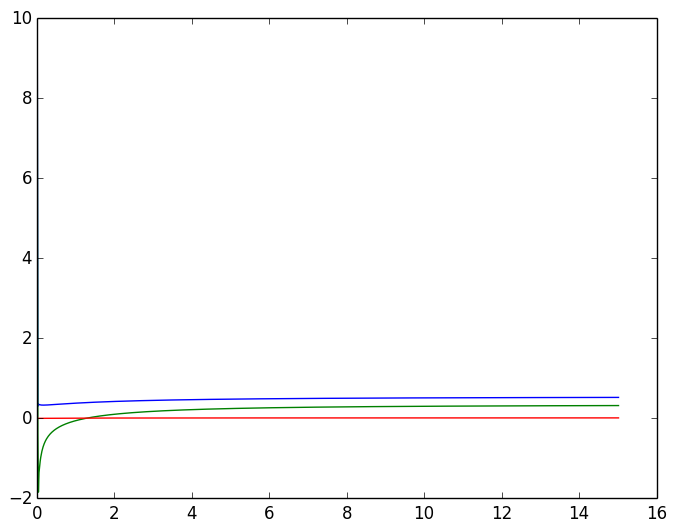

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a160910>

In [38]:

plot(W_mat[1][:,1],W_mat[1][:,6])
plot(W_mat[1][:,1],W_cl)
plot(W_mat[1][:,1],pi*AR*b_coeff[:,1])
#PyPlot.axis([12,14,0.2,0.6])

In [41]:
b_coeff[:,1]

1001-element Array{Float64,1}:
 0.0001173  
 0.000121788
 0.000141747
 0.000156582
 0.000169962
 0.00018193 
 0.000192835
 0.000202887
 0.00021224 
 0.000221004
 0.000229264
 0.000237087
 0.000244525
 ⋮          
 0.000734621
 0.000734658
 0.000734695
 0.000734732
 0.000734769
 0.000734805
 0.000734842
 0.000734879
 0.000734915
 0.000734952
 0.000734988
 0.000735025